# A. Perkenalan

## Team :
1. Nichoulaus Verdhy P - PYTN-KS011-0
2. Tassyirifiyya - PYTN-KS011-0
3. Isma - PYTN-KS011-0

Python for Data Science - Studi Independen - Kampus Merdeka

## Latar Belakang

dataset rideshare adalah sebuah kumpulan data yang berisi informasi tentang perjalanan taksi atau kendaraan dikota new york Amerika serikat, setiap baris data berisi informasi perjalanan, seperti lokasi awal dan akhir, merek dari taksi atau kendaraan, waktu perjalanan, serta informasi lainnya. 

dalam final project kali ini kami memakai dataset rideshare_kaggle.csv (Uber vs Lyft) yang telah disediakan oleh kode.id, dataset ini berisi kumpulan banyak informasi dari kendaraan tersebut,seperti informasi merek dari kendaraan tersebut, mempunyai masing masing informasi mengenai jarak yang di tempuh oleh kendaraan, dan informasi di dalamnya juga bisa di olah datanya sebagai informasi data perbandingan antara uber dengan lyft.



## Objektif

List Final Project 1 yang harus di capai adalah :

1. Mampu memahami konsep regression dengan Linear Regression

2. Mampu mempersiapkan data untuk digunakan dalam model Linear Regression

3. Mampu mengimplementasikan Linear Regression untuk membuat prediksi

# B. Import Pustaka

In [1]:
# import library preprocessing dan visualisasi
import numpy as np
from numpy import mean
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Import library modelling
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


#buat peta
import folium
from folium.plugins import FastMarkerCluster

#mengatur display biar maximal
pd.options.display.max_rows = None
pd.options.display.max_columns = None

import warnings
warnings.filterwarnings("ignore")

print('success!!')

success!!


# C. Data Loading

In [2]:
df = pd.read_csv('rideshare_kaggle.csv')
pd.set_option('display.max.columns',60)

In [3]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [4]:
#checing total row,columns
df.shape

(693071, 57)

In [5]:
#checking values/name of columns
df.columns.values

array(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude',
       'temperature', 'apparentTemperature', 'short_summary',
       'long_summary', 'precipIntensity', 'precipProbability', 'humidity',
       'windSpeed', 'windGust', 'windGustTime', 'visibility',
       'temperatureHigh', 'temperatureHighTime', 'temperatureLow',
       'temperatureLowTime', 'apparentTemperatureHigh',
       'apparentTemperatureHighTime', 'apparentTemperatureLow',
       'apparentTemperatureLowTime', 'icon', 'dewPoint', 'pressure',
       'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone',
       'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax',
       'uvIndexTime', 'temperatureMin', 'temperatureMinTime',
       'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'apparentTemperat

In [6]:
#showing statistic of dataset
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

In [7]:
#checking info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Dataset ini 57 kolom bertipe data integer, float, dan object. Masing- masing kolom mempunyai arti tersendiri yaitu:

1. id = 
2. 
3. 

dst

# D. Data Cleaning

In [8]:
df['datetime']=pd.to_datetime(df['datetime'])

Setelah dilakukan df.info() dapat dilihat bahwa terdapat 2 kolom yang memiliki nama yang mirip yaitu visibility dan visibility.1

In [9]:
df[['visibility','visibility.1']].duplicated().sum()

692844

dapat dilihat bahwa data yang dimiliki oleh kedua kolom sama, maka sebaiknya salah satu kolom dihapus.

In [10]:
df = df.drop(['visibility.1'],axis=1)

In [11]:
#checking null
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

**Total data = 693.071 data**

**Total missing value = 55.095**

Missing value berada pada kolom **Price**. Total missing value merupakan 7,95% dari total data aslinya. Sehingga, baris yang memiliki missing value dihapuskan.

In [12]:
#delete missing value
df.dropna(axis=0,inplace=True)

df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [13]:
#checking row,columns
df.shape

(637976, 56)

In [14]:
df.cab_type.value_counts()

Uber    330568
Lyft    307408
Name: cab_type, dtype: int64

In [15]:
df.month.value_counts()

12    374205
11    263771
Name: month, dtype: int64

# E. Explorasi Data Analyst

Sekarang kita akan melakukan Explorasi data yang bertujuan untuk menganalisis data yang ada pada dataset kita kali ini. Sebelumnya untuk mempermudah kita menganalisis data ini, kita akan buat beberapa fungsi sendiri.

> yang pertama plot_line_and_bar. Ini digunakan untuk memberikan visualisasi berupa line dan bar

> yang kedua ada plt_line_double. Ini digunakan untuk memberikan visualisasi berupa line dengan perbandingan 2 kolom

> yang ketiga ada plt_bar_double. Ini digunakan untuk memberikan visualisasi berupa bar dengan perbandingan 2 kolom

> yang keempat ada heat_map. Digunakan untuk memberikan visualisasi kroelasi antar kolom

In [16]:
def plot_line_and_bar(groupby_column):
    df1 = df.groupby(groupby_column).size().reset_index(name="counts")  # Mengelompokkan data dan menghitung jumlah data dalam setiap grup
    x = df1[groupby_column]  # Menyimpan data kolom groupby_column ke dalam variabel x
    y = df1["counts"]  # Menyimpan data kolom counts ke dalam variabel y
    num_colors = len(df1)  # Menghitung jumlah warna yang dibutuhkan untuk plot
    colormap = plt.cm.get_cmap('tab20', num_colors)  # Mengambil colormap dengan jumlah warna yang sesuai
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))  # Membuat objek plot dengan 2 subplot, serta mengatur ukuran figure menjadi 20x10 inches

    # Plot Line
    for i in range(num_colors): #perulangan untuk warna
        ax1.plot(x, y, marker='o', color=colormap(i))  # Setiap line plot diberi warna yang berbeda sesuai dengan colormap
    ax1.set_xlabel(groupby_column)  # Label sumbu x
    ax1.set_ylabel('Jumlah')  # Label sumbu y
    ax1.set_title(f'Line Plot untuk {groupby_column}')  # Judul plot

    # Plot Bar
    bars = ax2.bar(x, y, color=colormap(np.arange(num_colors)))  # Membuat plot bar
    ax2.set_xlabel(groupby_column)  # Label sumbu x
    ax2.set_ylabel('Jumlah')  # Label sumbu y
    ax2.set_title(f'Bar Plot untuk {groupby_column}')  # Judul plot
    ax2.legend(bars, df1[groupby_column], title=groupby_column, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)  # Menambahkan legend pada penunjuk di sebelah kanan

    print(df1) # Menampilkan isi data series
    plt.show()  # Menampilkan plot


In [17]:
# Membuat fungsi plt_line_double dengan 2 argumen
def plt_line_double(groupby1, groupby2):
    # Melakukan groupby pada DataFrame df berdasarkan kolom groupby1 dan groupby2, dan menghitung jumlah
    df2 = df.groupby(by=[groupby1, groupby2]).size().reset_index(name="counts")
    
    # Mengambil nilai x dan y dari DataFrame df2
    x = df2[groupby1]
    y = df2["counts"]
    
    # Mengambil nilai warna dari DataFrame df2
    colors = df2[groupby2]
    
    # Membuat objek figure dan axis pada plot
    fig, ax = plt.subplots(figsize=(20,15))
    
    # Mengiterasi warna yang ada pada DataFrame df2
    for cab_type in df2[groupby2].unique():
        # Membuat plot garis dengan marker berbentuk 'o' untuk setiap warna yang berbeda
        ax.plot(x[colors == cab_type], y[colors == cab_type], marker='o', label=cab_type)

    # Menyertakan label pada sumbu x dan y, serta judul plot
    ax.set_xlabel(groupby1)
    ax.set_ylabel('Counts')
    ax.set_title('Line Chart')
    
    # Menyertakan legenda pada plot
    ax.legend()
    
    # Menampilkan plot
    print(df2)
    plt.show()

In [18]:
def plt_bar_double(groupby1, groupby2):
    # Melakukan groupby pada DataFrame df berdasarkan kolom groupby1 dan groupby2, dan menghitung jumlah
    df2 = df.groupby(by=[groupby1, groupby2]).size().reset_index(name="counts")

    # Mengambil nilai x dan y dari DataFrame df2
    x = df2[groupby1]
    y = df2["counts"]

    # Mengambil nilai warna dari DataFrame df2
    colors = df2[groupby2]

    # Menentukan palet warna "tab20" dari matplotlib
    color_palette = plt.cm.get_cmap("tab20", len(df2[groupby2].unique()))

    # Membuat objek figure dan axis pada plot
    fig, ax = plt.subplots(figsize=(20,15))

    # Mengiterasi warna yang ada pada DataFrame df2
    for i, cab_type in enumerate(df2[groupby2].unique()):
        # Membuat plot bar dengan lebar 0.35 untuk setiap warna yang berbeda
        ax.bar(x[colors == cab_type], y[colors == cab_type], width=0.35, label=cab_type, color=color_palette(i))

    # Menyertakan label pada sumbu x dan y, serta judul plot
    ax.set_xlabel(groupby1)
    ax.set_ylabel('Counts')
    ax.set_title('Bar Chart')

    # Menyertakan legenda pada plot
    ax.legend()

    # Menampilkan plot
    print(df2)
    plt.show()


In [19]:
def plt_pie_double(groupby1, groupby2):
    # Melakukan groupby pada DataFrame df berdasarkan kolom groupby1 dan groupby2, dan menghitung jumlah
    df2 = df.groupby(by=[groupby1, groupby2]).size().reset_index(name="counts")

    # Mengambil nilai x dan y dari DataFrame df2
    x = df2[groupby1]
    y = df2["counts"]

    # Mengambil nilai warna dari DataFrame df2
    colors = df2[groupby2]

    # Menentukan palet warna "tab20" dari matplotlib
    color_palette = plt.cm.get_cmap("tab20", len(df2[groupby2].unique()))

    # Membuat objek figure dan axis pada plot
    fig, ax = plt.subplots(figsize=(10, 10))

    # Mengiterasi warna yang ada pada DataFrame df2
    for i, cab_type in enumerate(df2[groupby2].unique()):
        # Membuat plot pie chart untuk setiap warna yang berbeda
        ax.pie(y[colors == cab_type], labels=x[colors == cab_type], 
               autopct='%1.1f%%', startangle=90, 
               colors=[color_palette(i)], labeldistance=0.5,
               wedgeprops={'edgecolor': 'white'})

    # Menyertakan judul plot
    ax.set_title('Pie Chart')

    # Menampilkan plot
    plt.show()


In [20]:
def heat_map(nama_df,list_kolom): #nama df itu nama datasetnya, list kolom adalah list korelasi yang ingin di cek
    df_sementara = nama_df[list_kolom] #memasukkan data kolom tersebut kedalam variabel baru
    plt.figure(figsize=(20,23)) #menyetting ukuran
    sns.heatmap(df_sementara.corr(),annot=True,cmap="Reds", annot_kws={'fontsize': 15}) #melakukan heat map dengan menampilkan nilai dari korelasi dengan warna merah dan font size 15

Sekarang kita lihat lagi kolom yang ada pada dataset beserta jenisnya

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 56 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           637976 non-null  object        
 1   timestamp                    637976 non-null  float64       
 2   hour                         637976 non-null  int64         
 3   day                          637976 non-null  int64         
 4   month                        637976 non-null  int64         
 5   datetime                     637976 non-null  datetime64[ns]
 6   timezone                     637976 non-null  object        
 7   source                       637976 non-null  object        
 8   destination                  637976 non-null  object        
 9   cab_type                     637976 non-null  object        
 10  product_id                   637976 non-null  object        
 11  name                      

## Analisis berdasarkan waktu

Sekarang, kita akan menganilisis berdasarkan waktu. Mulai dari Bulan, hari, dan jam untuk setiap orderannya

   month  counts
0     11  263771
1     12  374205


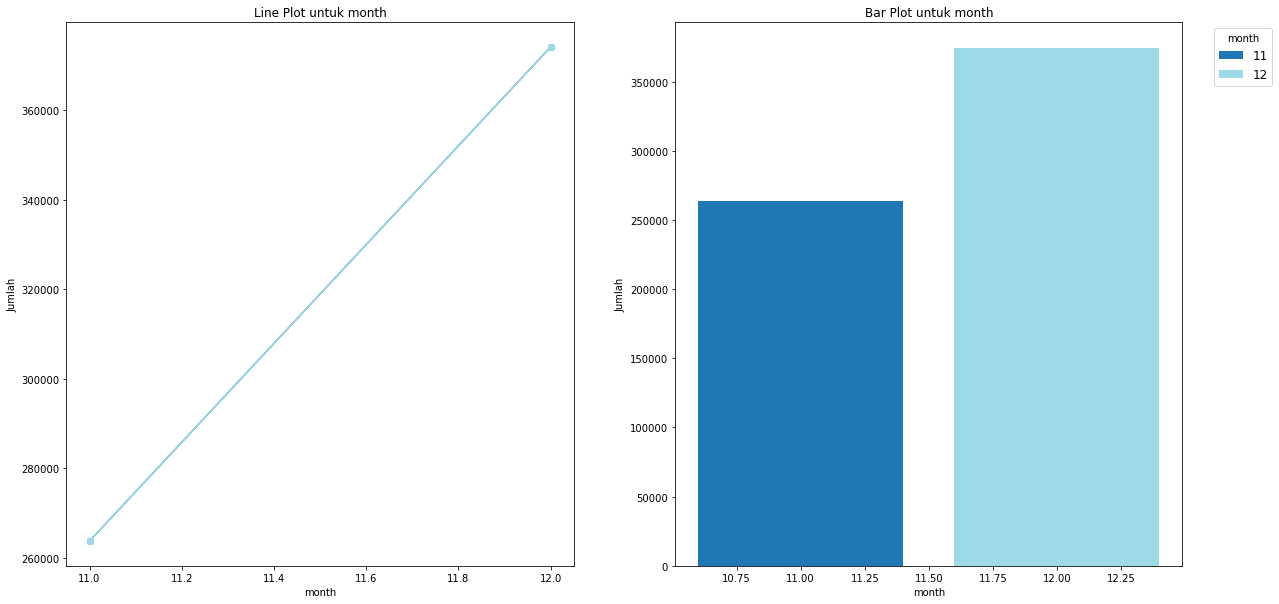

In [22]:
plot_line_and_bar('month')

_Keterangan_

> Ternyata dari data diatas, hanya terdapat 2 bulan saja. Orderan diatas memaparkan bulan 11 dan bulan 12 saja.

> Dari data diatas ternyata banyaknya jumlah orderan pada bulan 12 dari pada bulan 11.

> banyaknya orderan pada bulan 11 adalah 263.771 dan pada bulan 12 374.205.

> Selisih dari keduar ordera bulan tersebut sebesar 110,434

    day  counts
0     1   41680
1     2   41298
2     3   41323
3     4   11627
4     9    1529
5    10    2534
6    13   35496
7    14   41344
8    15   41332
9    16   41359
10   17   41354
11   18   33329
12   26   29028
13   27   70135
14   28   67842
15   29   55222
16   30   41544


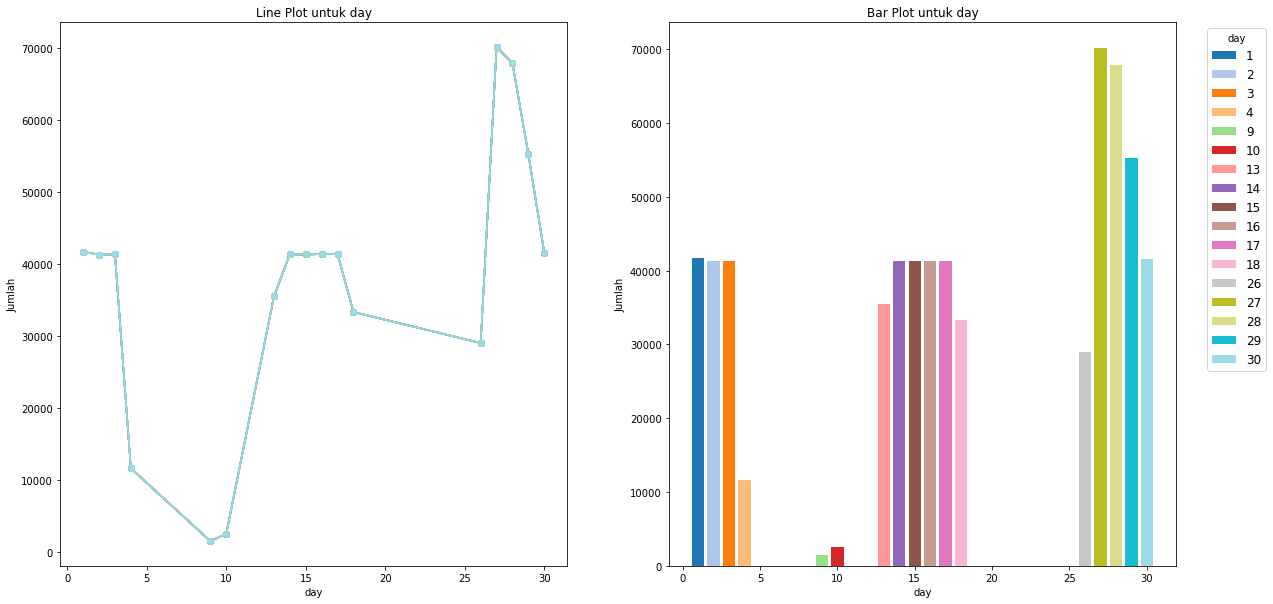

In [23]:
plot_line_and_bar('day')

_Keterangan_

> Orderan sangat  tinggi pada hari 27 dengan total angka orderan 70.135

> Orderan paling sedikit pada hari 9 dengan total angka orderannya 41.359

> Orang orang tidak sama sekali pada hari 5,6,7,8,11,12,19,20,12,22,23,24,25

> Peningkatan orderan mulai menaik signifikan di saat ahkir bulan dari 26 ke 27

    hour  counts
0      0   29872
1      1   26310
2      2   26323
3      3   25530
4      4   26125
5      5   22995
6      6   25147
7      7   22930
8      8   22337
9      9   26673
10    10   27918
11    11   27946
12    12   28017
13    13   27977
14    14   27976
15    15   27868
16    16   27972
17    17   28075
18    18   27958
19    19   25410
20    20   24620
21    21   25549
22    22   27093
23    23   29355


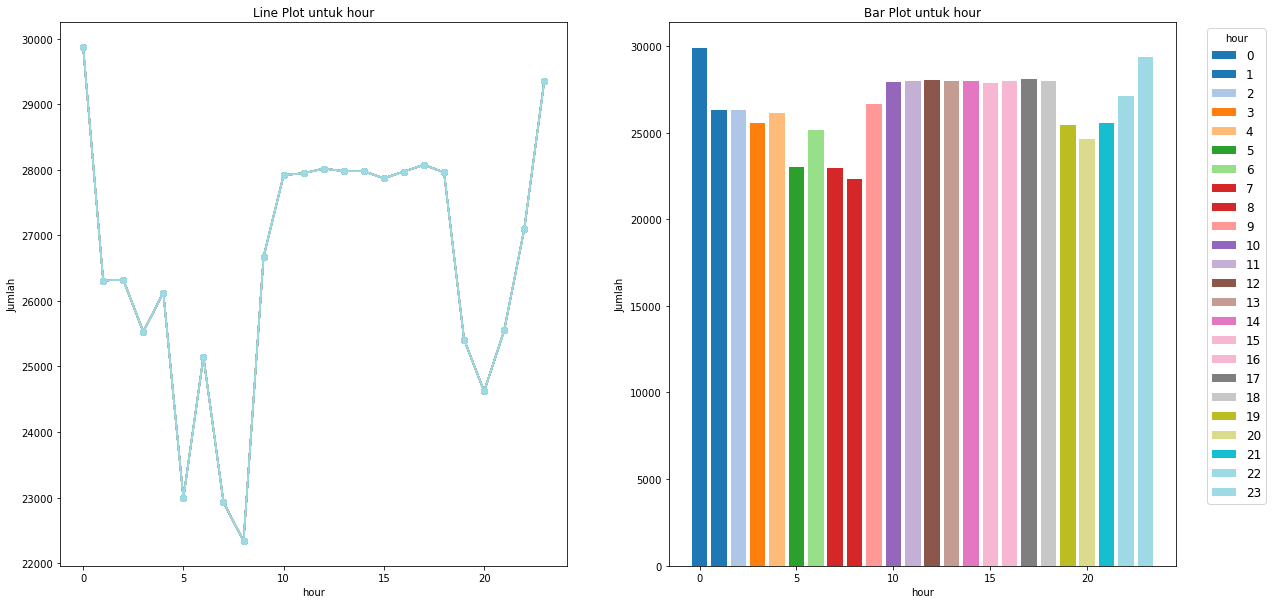

In [24]:
plot_line_and_bar('hour')

_Keterangan_
>Orang orang sering memesan  taxi pada _hour_ 0 dengan jumlah 29.872 dan jarang memesan pada _hour_ 8 dengan jumlah 22.337 . 

>Orderan mulai ramai dan stabil pada _hour_ 10  sampai dengan _hour_ 18. 

>Peningkatan order secara signifikan mulai meningkat pada saat _hour_ 8 ke _hour_ 9. 

    day  month  counts
0     1     12   41680
1     2     12   41298
2     3     12   41323
3     4     12   11627
4     9     12    1529
5    10     12    2534
6    13     12   35496
7    14     12   41344
8    15     12   41332
9    16     12   41359
10   17     12   41354
11   18     12   33329
12   26     11   29028
13   27     11   70135
14   28     11   67842
15   29     11   55222
16   30     11   41544


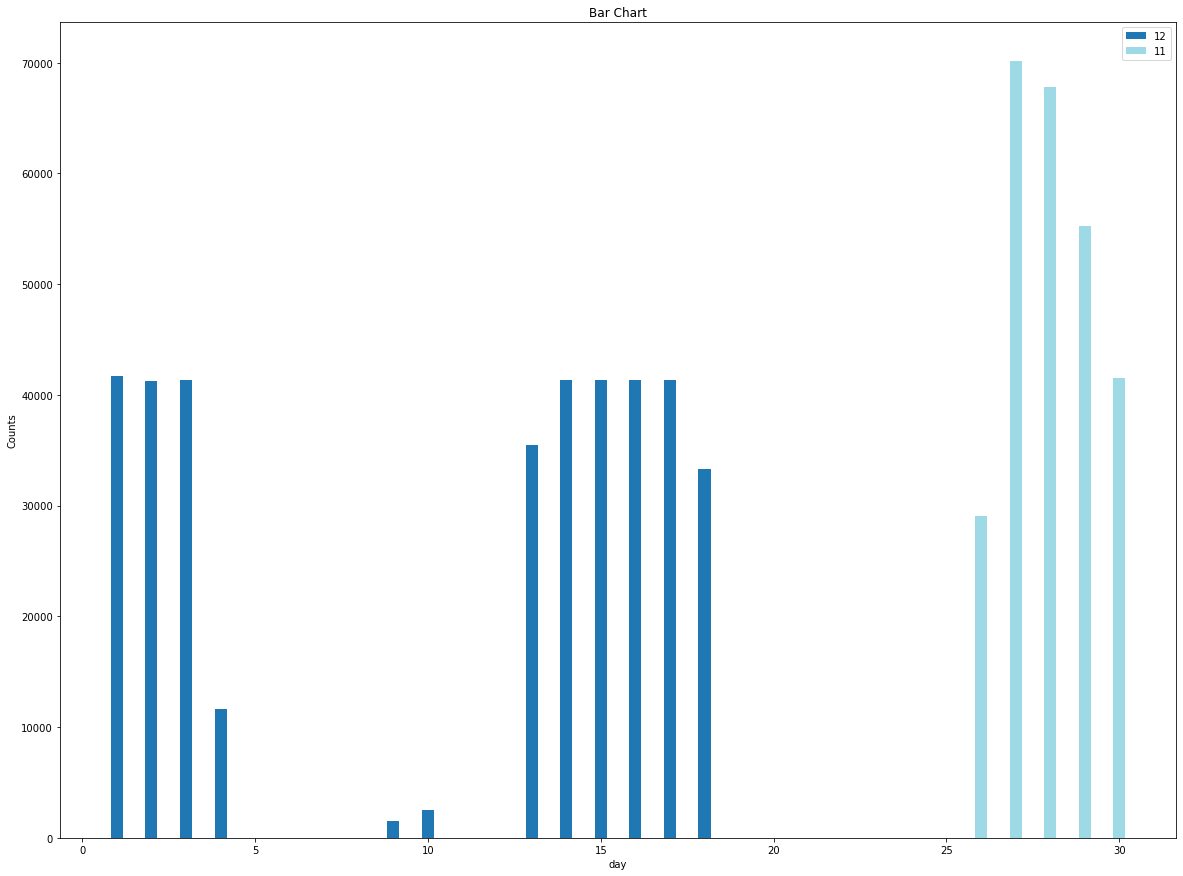

In [25]:
plt_bar_double("day","month")

_Keterangan_

> Dari data diatas, data ini dimulai dihitung dari bulan November ahkir hingga pertengahan Desember.

> Tidak setriap ahrinya orang memesan taxi.

> Peningkatan orderan sangat menjulang tinggi pada saat ahkir bulan November pada hari 26 ke 27.

> orderan stabil pada saat pertengahan bulan Desember mulai hari 14 hingga 17

    month  hour  counts
0      11     0   13545
1      11     1   10642
2      11     2    8904
3      11     3    8914
4      11     4    9026
5      11     5    5761
6      11     6    8223
7      11     7    7591
8      11     8    6810
9      11     9   11134
10     11    10   12442
11     11    11   12426
12     11    12   12470
13     11    13   12482
14     11    14   12444
15     11    15   12453
16     11    16   12441
17     11    17   12524
18     11    18   12463
19     11    19   11056
20     11    20   10865
21     11    21   11749
22     11    22   13314
23     11    23   14092
24     12     0   16327
25     12     1   15668
26     12     2   17419
27     12     3   16616
28     12     4   17099
29     12     5   17234
30     12     6   16924
31     12     7   15339
32     12     8   15527
33     12     9   15539
34     12    10   15476
35     12    11   15520
36     12    12   15547
37     12    13   15495
38     12    14   15532
39     12    15   15415
40     12    16 

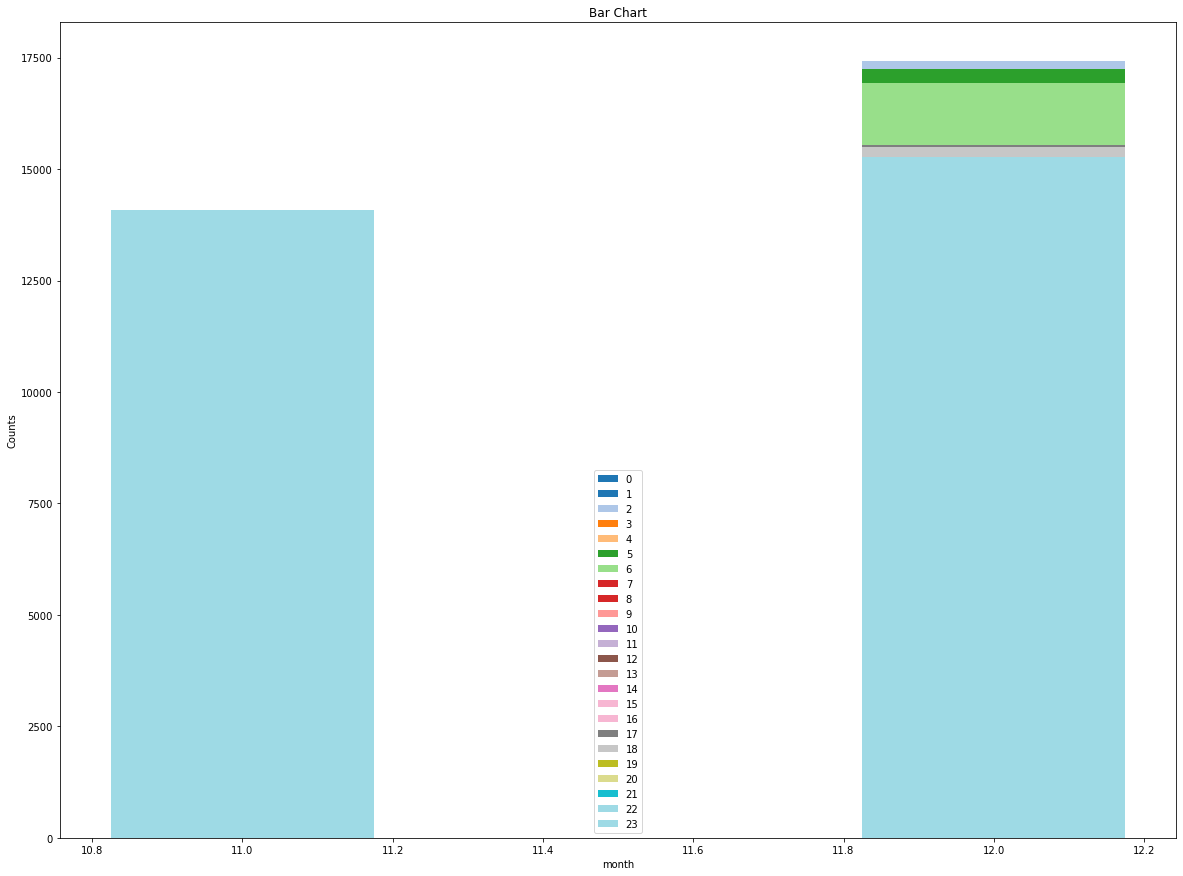

In [26]:
plt_bar_double("month","hour")

_keterangan_

> Grafik diatas menjelaskan pada bulan November, para costumer memesan layanan taxi pada malam hari dominannya (jam 23).

> Sedangkan pada bulan Desember ,  didominan pada jam pagi yaitu jam 2. Dan disusul dengan jam jam lainnya seperti jam 5 6 dan sore pada pukul 17 18

     day  hour  counts
0      1     0    1730
1      1     1    1714
2      1     2    2008
3      1     3    1723
4      1     4    1725
5      1     5    1729
6      1     6    1732
7      1     7    1721
8      1     8    1728
9      1     9    1739
10     1    10    1699
11     1    11    1718
12     1    12    1723
13     1    13    1734
14     1    14    1740
15     1    15    1738
16     1    16    1721
17     1    17    1726
18     1    18    1733
19     1    19    1722
20     1    20    1719
21     1    21    1720
22     1    22    1727
23     1    23    1711
24     2     0    1723
25     2     1    1732
26     2     2    1721
27     2     3    1705
28     2     4    1728
29     2     5    1715
30     2     6    1728
31     2     7    1708
32     2     8    1714
33     2     9    1724
34     2    10    1717
35     2    11    1732
36     2    12    1715
37     2    13    1722
38     2    14    1736
39     2    15    1696
40     2    16    1715
41     2    17    1725
42     2   

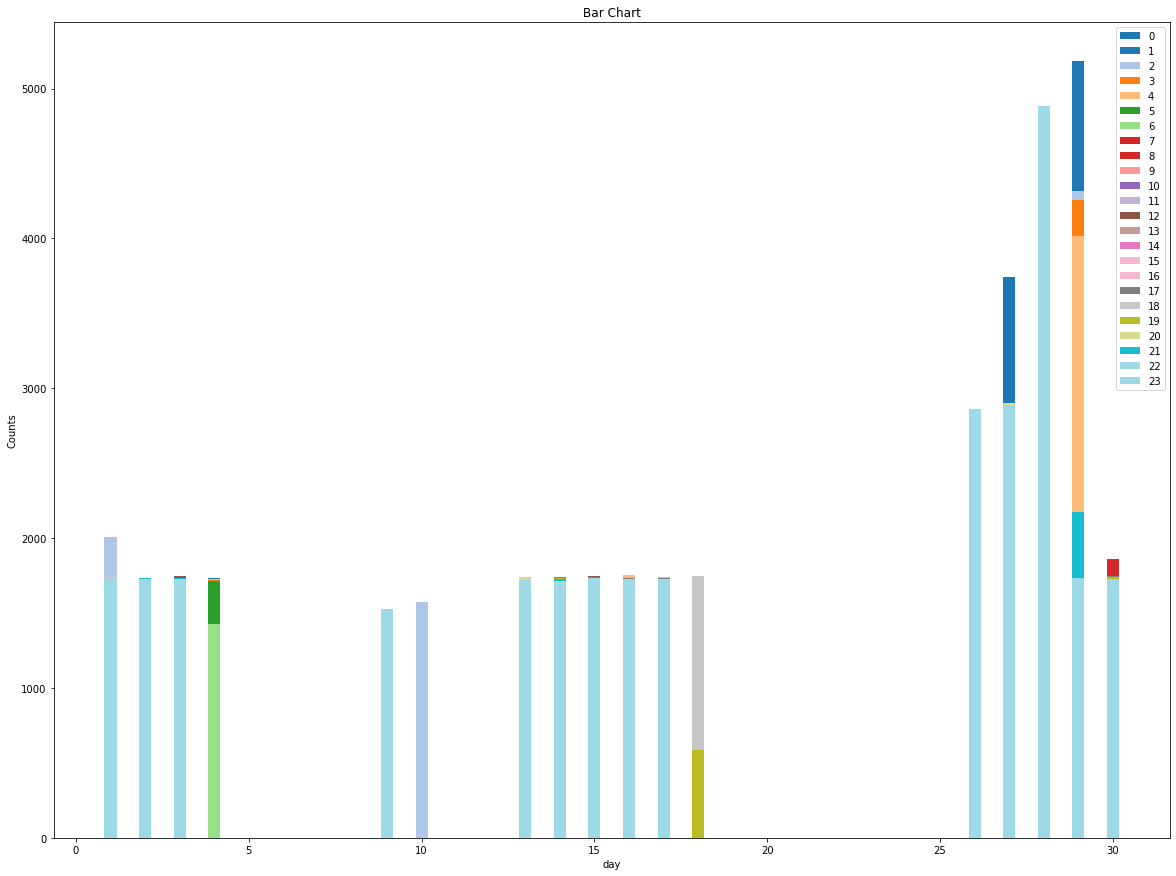

In [27]:
plt_bar_double("day","hour")

_keterangan_

> Kita ketahui Bulan November itu mulai dari tanggal 26-30. Dari data yang ada, Ahkir bulan November lebih didominasi oleh orderan di jam malam menuju jam pagi

> Pada Bulan Desember lebih didominasi pada jam pagi 5 menuju 6, jam siang, dan jam pulang kantor jam 17 18

### Kesimpulan Analisis berdasarkan waktu (day, hour, month)

Dari data diatas dapat disimpulkan bahwa, jumlah orderan yang dipesan oleh para costumer dipengaruhi oleh jam dan hari pada saat itu juga. Bisa kita mabil contoh pada ahkir bulan November, orderan meningkat sangat tinggi dan untuk jamnya diahkir november adalah jam malam sedangkan pada bulan desember adalah jam pagi siang dan sore. 

## Analisis Berdasarkan Layanan

  cab_type  counts
0     Lyft  307408
1     Uber  330568


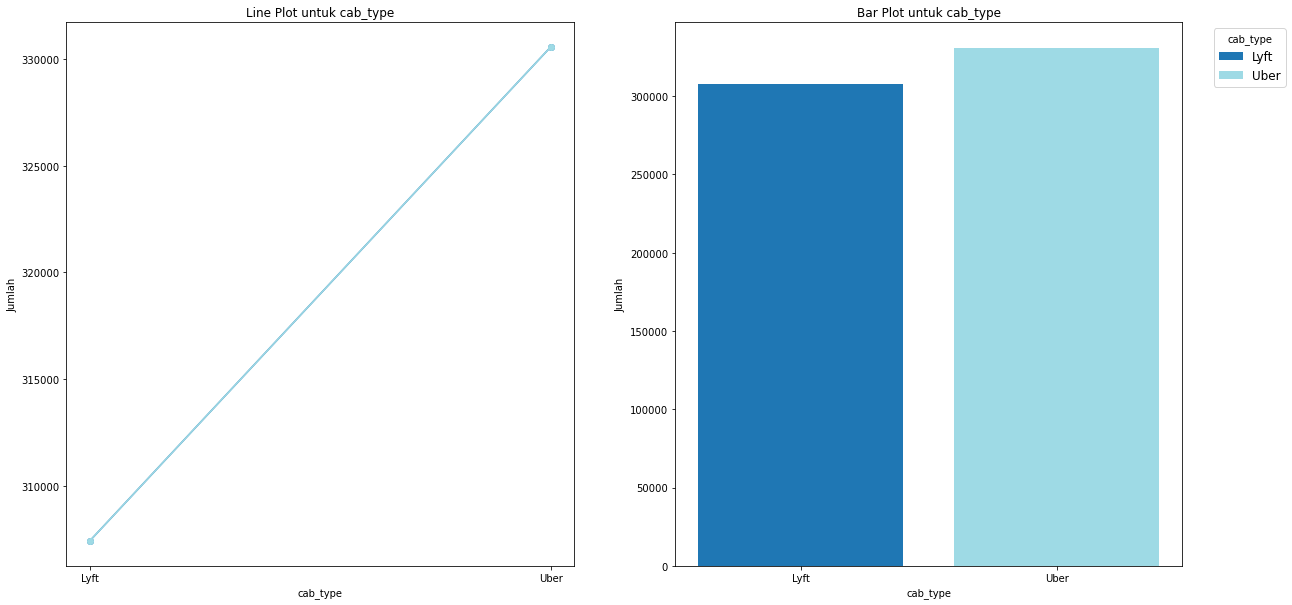

In [28]:
plot_line_and_bar("cab_type")

_Keterangan_
> Hasil menunjukkan bahwa para costumer lebih dominan memesan layanan Uber dari pada Lyft.

> Uber berada pada angka 330568 dan Lyft pada angka 307408

> Selisihnya pun cukup terpaut sejumlah 23,160

            name cab_type  counts
0          Black     Uber   55095
1      Black SUV     Uber   55096
2            Lux     Lyft   51235
3      Lux Black     Lyft   51235
4   Lux Black XL     Lyft   51235
5           Lyft     Lyft   51235
6        Lyft XL     Lyft   51235
7         Shared     Lyft   51233
8       UberPool     Uber   55091
9          UberX     Uber   55094
10        UberXL     Uber   55096
11           WAV     Uber   55096


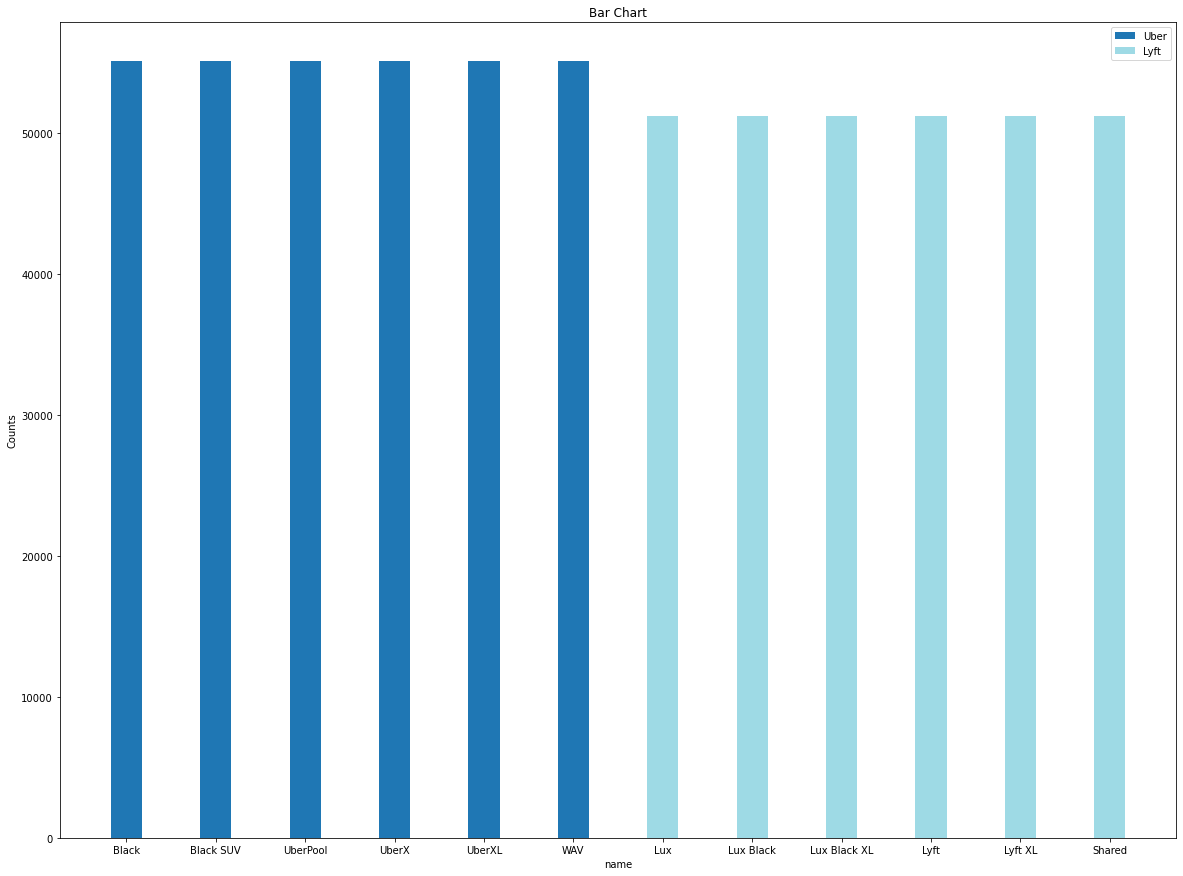

In [29]:
plt_bar_double("name","cab_type")

_keterangan_

> dari sini kita bisa melihat jenis mobil yang dimiliki dari masing masing layanan
untuk UBER memiliki Black, Black SUV, Uberpool, UberX, UberXL, WAV

> sedangangkan untuk lyft adalah LUX, LUX Black, Lux Black XL, Lyft, Lyft XL, Shared

> Pada Uber yang paling diminati adalah WAV, UBER XL, Black SUV

> Sedangkan pada Lyft semuanya meminati

     price          name  counts
0     2.50        Shared     211
1     3.00        Shared    5543
2     3.50        Shared    5063
3     4.50      UberPool     419
4     5.00          Lyft     129
5     5.00        Shared   13885
6     5.00      UberPool      70
7     5.50      UberPool    2260
8     6.00      UberPool     328
9     6.00         UberX     169
10    6.00           WAV     169
11    6.50      UberPool    4858
12    6.50         UberX     266
13    6.50           WAV     266
14    7.00          Lyft   16120
15    7.00        Shared   19733
16    7.00      UberPool    3192
17    7.00         UberX    6634
18    7.00           WAV    6635
19    7.50      UberPool    8023
20    7.50         UberX    4964
21    7.50           WAV    4964
22    7.98          Lyft       1
23    8.00      UberPool    5985
24    8.00         UberX    3943
25    8.00        UberXL      14
26    8.00           WAV    3943
27    8.35          Lyft       1
28    8.50      UberPool    4962
29    8.50

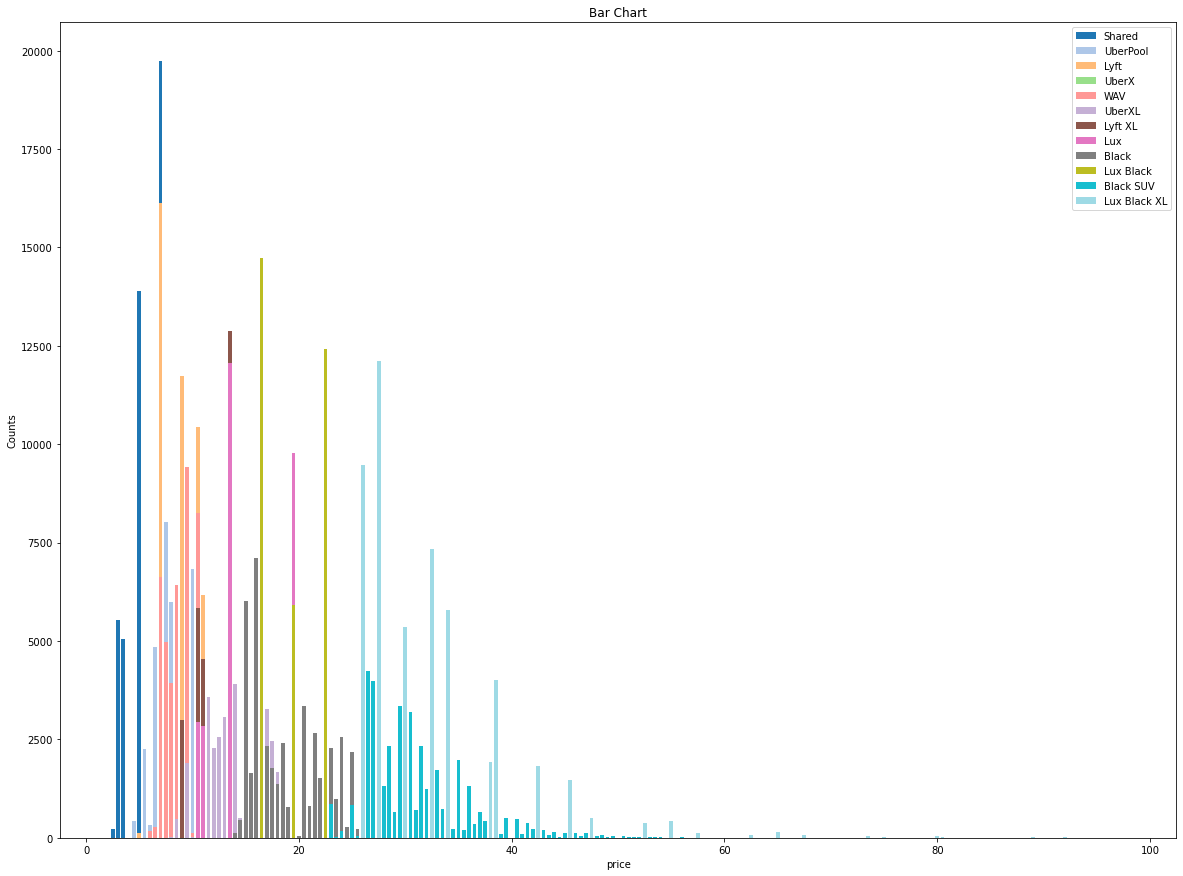

In [30]:
plt_bar_double("price","name")

_Keterangan_

> pada grafik diatas layanan mobil yang dipakai adlaah Shared yang paling sering diorder dari Lyft dengan harga yang rendah. 

> Untuk Uber adalah BLACK dengan ahrga yang bisa dibnilang relatif murah

> Untuk harga yang kisarannya diatas 40.0 mayoritas menggunakan layanan dari Lyft.

### Kesimpulan Analisis Berdasarkan Layanan

Dapat disimpulkan dari Analsisis berdasarkan layanan, bahwa layanan yang sering dipakai adalah UBER dari pada lyft. Untuk harga bisa dipengaruhi oleh jenis mobil yang dipesan oleh para costumer. Hal ini bisa membuat kolom cab_type dan name menjadi faktor pengaruh harga layanan taxi

## Analisis Berdasarkan Titik Jemput dan Titik Sampai

Sebelum melaukan visualisasi, mari kita melihat rata rata harga dari masing masing tempat

                     source  counts
0                  Back Bay   53201
1               Beacon Hill   52841
2         Boston University   53172
3                    Fenway   53166
4        Financial District   54197
5          Haymarket Square   53147
6                 North End   53171
7             North Station   52576
8   Northeastern University   53164
9             South Station   53160
10         Theatre District   53201
11                 West End   52980


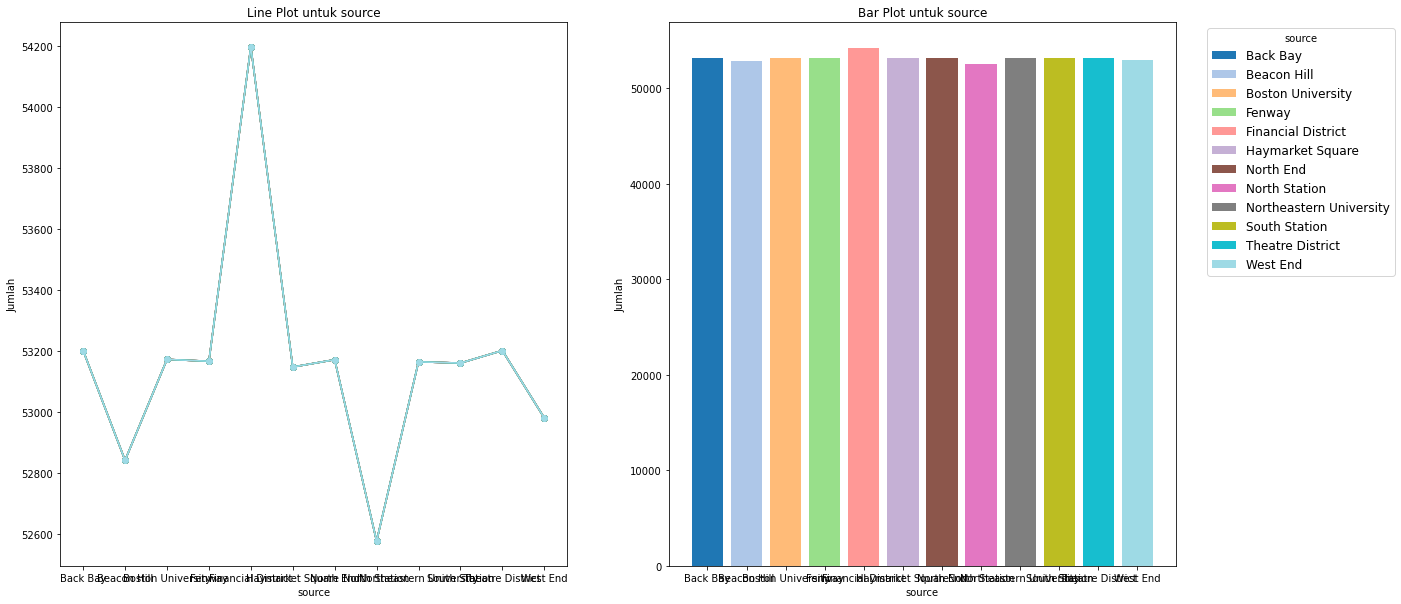

In [31]:
plot_line_and_bar("source")

                destination  counts
0                  Back Bay   53190
1               Beacon Hill   52840
2         Boston University   53171
3                    Fenway   53166
4        Financial District   54192
5          Haymarket Square   53171
6                 North End   53164
7             North Station   52577
8   Northeastern University   53165
9             South Station   53159
10         Theatre District   53189
11                 West End   52992


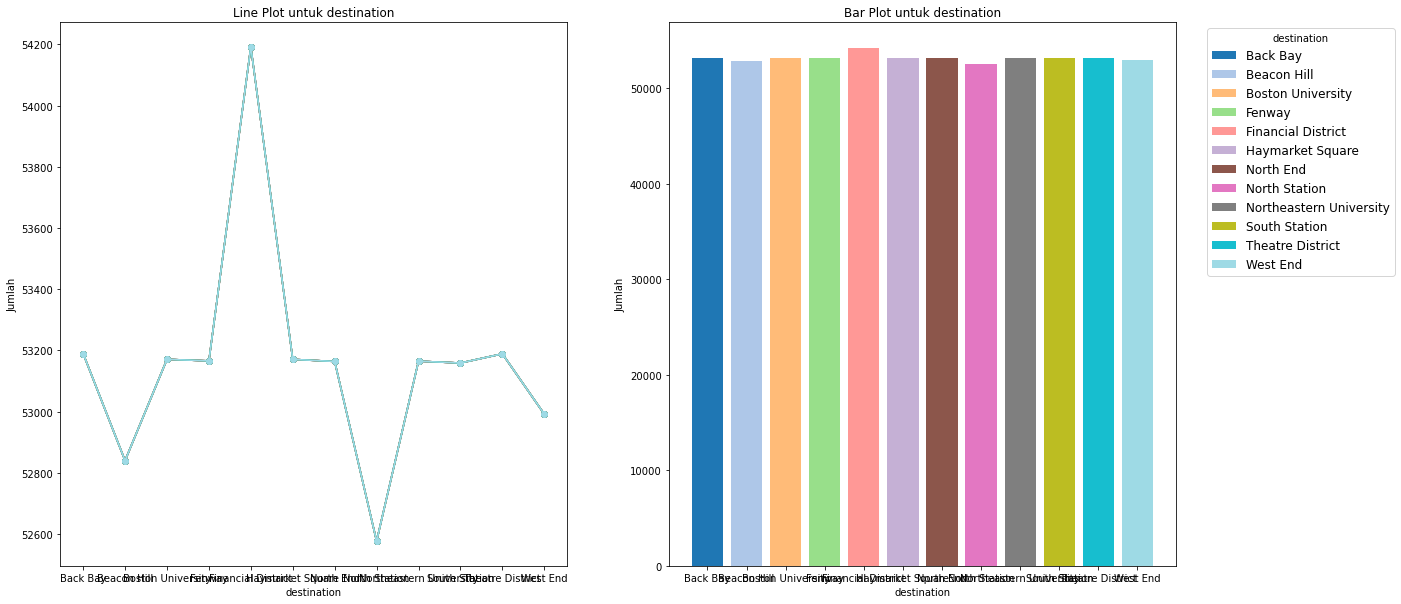

In [32]:
plot_line_and_bar("destination")

                     source              destination  counts
0                  Back Bay        Boston University    8682
1                  Back Bay                   Fenway    8718
2                  Back Bay         Haymarket Square    8838
3                  Back Bay                North End    9414
4                  Back Bay  Northeastern University    8825
5                  Back Bay            South Station    8724
6               Beacon Hill        Boston University    8490
7               Beacon Hill                   Fenway    8688
8               Beacon Hill         Haymarket Square    8802
9               Beacon Hill                North End    9240
10              Beacon Hill  Northeastern University    8916
11              Beacon Hill            South Station    8705
12        Boston University                 Back Bay    8682
13        Boston University              Beacon Hill    8484
14        Boston University       Financial District    8940
15        Boston Univers

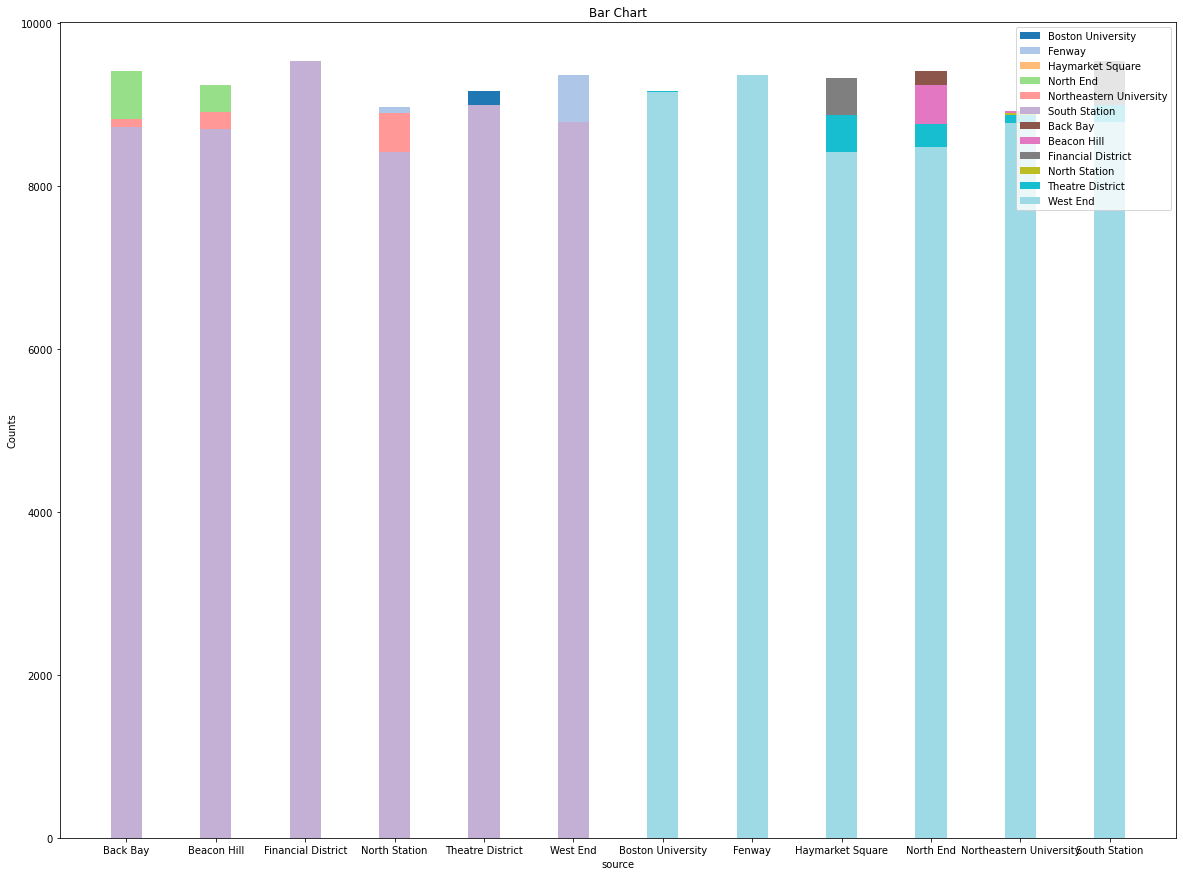

In [33]:
plt_bar_double("source","destination")

_keterangan_

Dari grafik diatas dapat disimpulkan bahwa orang orang mayoritas sering melakukan pemesanan Taxi pada daerah South Station dan West End

                destination                   source  counts
0                  Back Bay        Boston University    8682
1                  Back Bay                   Fenway    8724
2                  Back Bay         Haymarket Square    8838
3                  Back Bay                North End    9414
4                  Back Bay  Northeastern University    8820
5                  Back Bay            South Station    8712
6               Beacon Hill        Boston University    8484
7               Beacon Hill                   Fenway    8688
8               Beacon Hill         Haymarket Square    8802
9               Beacon Hill                North End    9240
10              Beacon Hill  Northeastern University    8920
11              Beacon Hill            South Station    8706
12        Boston University                 Back Bay    8682
13        Boston University              Beacon Hill    8490
14        Boston University       Financial District    8940
15        Boston Univers

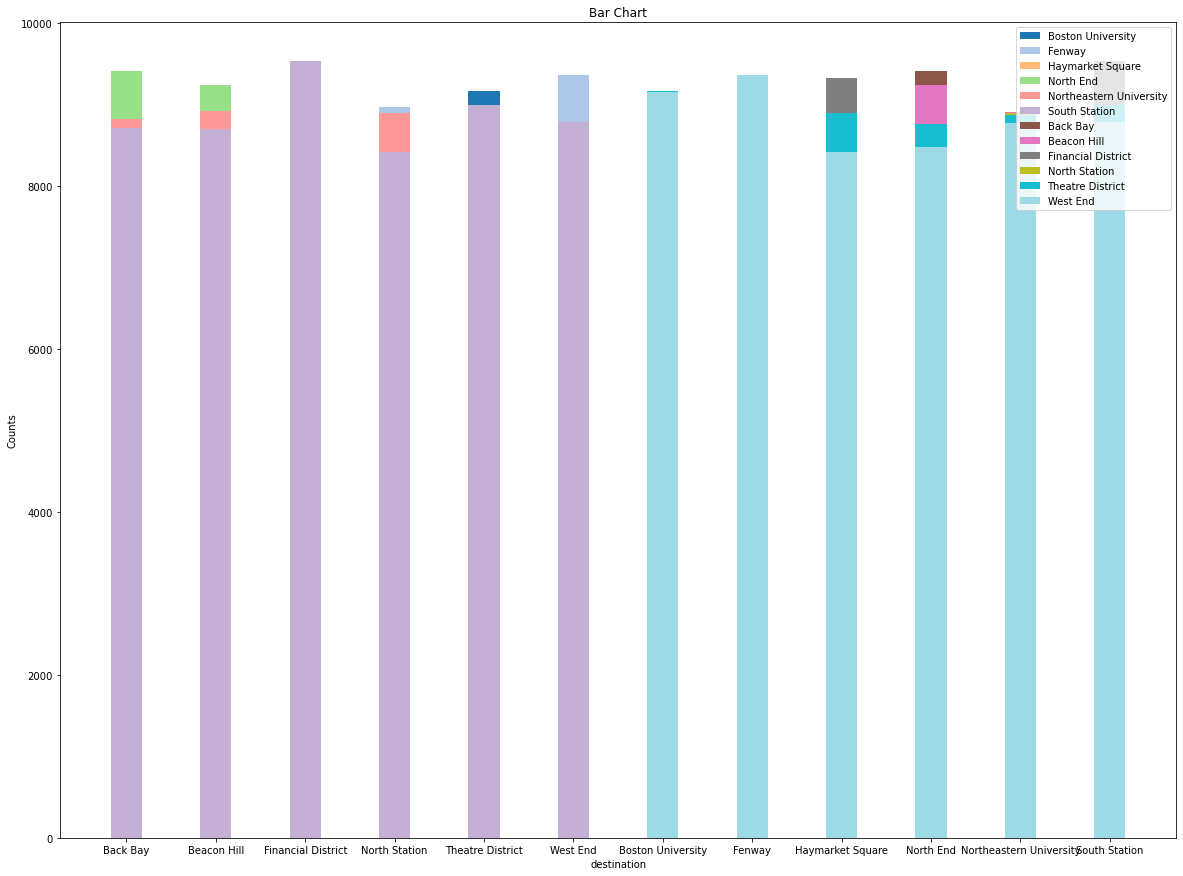

In [34]:
plt_bar_double("destination","source")

Dari grafik diatas dapat disimpulkan bahwa orang orang mayoritas sering menuju pada daerah menggunakan Taxi ke daerah South Station dan West End

Sekarang amri kita lihat rata rata harga yang ada dari destinasi dengan daerah yang dituju

In [35]:
# Melakukan groupby dan menghitung rata-rata price
df.groupby(by=["source","destination"]).price.agg(["mean"])

mean
source                  destination                       
Back Bay                Boston University        14.039392
                        Fenway                   13.658752
                        Haymarket Square         17.987384
                        North End                19.473019
                        Northeastern University  13.151040
                        South Station            17.700711
Beacon Hill             Boston University        16.376737
                        Fenway                   16.158840
                        Haymarket Square         13.799137
                        North End                15.270942
                        Northeastern University  16.471792
                        South Station            15.950661
Boston University       Back Bay                 13.992801
                        Beacon Hill              17.315535
                        Financial District       24.146085
                        North Station            20.185338
                        Theatre District         18.689557
                        West End                 18.611766
Fenway                  Back Bay                 13.802155
                        Beacon Hill              16.796674
                        Financial District       23.438818
                        North Station            19.701839
                        Theatre District         18.232722
                        West End                 18.161806
Financial District      Boston University        25.498434
                        Fenway                   23.404850
                        Haymarket Square         13.188209
                        North End                13.179635
                        Northeastern University  21.918584
                        South Station            12.349066
Haymarket Square        Back Bay                 16.860489
                        Beacon Hill              13.338559
                        Financial District       12.731618
                        North Station            12.332545
                        Theatre District         13.677272
                        West End                 12.529855
North End               Back Bay                 19.550935
                        Beacon Hill              15.982630
                        Financial District       13.417597
                        North Station            12.824092
                        Theatre District         15.169406
                        West End                 13.494873
North Station           Boston University        18.931558
                        Fenway                   18.547603
                        Haymarket Square         12.571791
                        North End                13.106641
                        Northeastern University  19.537848
                        South Station            15.374198
Northeastern University Back Bay                 13.698923
                        Beacon Hill              16.842433
                        Financial District       22.582094
                        North Station            19.910939
                        Theatre District         16.144805
                        West End                 18.204155
South Station           Back Bay                 19.103822
                        Beacon Hill              17.276304
                        Financial District       12.436910
                        North Station            15.746736
                        Theatre District         13.952579
                        West End                 15.881172
Theatre District        Boston University        20.360662
                        Fenway                   19.069278
                        Haymarket Square         15.204973
                        North End                15.159646
                        Northeastern University  16.910751
                        South Station            12.888926
West End                Boston University 

Dari data diatas mari kita lihat manakah source dan destination yang memiliki harga tertinggi

In [36]:
#mencari data yang mempunyai nilai tertinggi
print('Harga tertinggi :',df.price.max())
df[df['price']==df.price.max()]

Harga tertinggi : 97.5


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
597071,ba1593a1-e4fd-4c7a-a011-e2d4fccbf081,1.543714e+09,1,2,12,2018-12-02 01:28:02,America/New_York,Financial District,Fenway,Lyft,lyft_luxsuv,Lux Black XL,97.5,4.43,2.0,42.3503,-71.081,35.52,35.52,Clear,Light rain in the morning and overnight.,0.0,0.0,0.82,1.85,2.37,1543672800,9.846,44.65,1543690800,34.88,1543712400,43.98,1543690800,35.53,1543712400,clear-night,30.46,1023.52,146,0.12,0,274.6,1543665335,1543698860,0.82,0.0,1543683600,31.57,1543665600,44.65,1543690800,28.1,1543658400,43.98,1543690800


Ternyata harga tertinggi ada pada Financial Distric menuju pada Fenway. Untuk melihat akan tetapi Financial distric ke Fenway ini mempunyai rata rata pada angka 23. Mari kita lihat pada peta untuk letak jaraknya dengan mencari longtidue dan latitude yang sama.

In [37]:
#melakukan pengecekan destinasi
df[df['price']==df.price.max()][['latitude','longitude']]

,latitude,longitude
597071,42.3503,-71.081


In [38]:
# Membuat objek peta folium yang terpusat pada lokasi yang ditentukan, dengan tingkat zoom awal 14
map1 = folium.Map(location=(42.3503,-71.081), zoom_start=14)

# Menambahkan marker pada lokasi Fenway dengan menggunakan koordinat latitude dan longitude yang ditentukan
folium.Marker(location=(42.3503,-71.081)).add_to(map1)

# Menambahkan marker pada lokasi Financial District dengan menggunakan koordinat latitude dan longitude yang ditentukan
folium.Marker(location=(42.3378,-71.066)).add_to(map1)

# Menampilkan objek peta folium
display(map1)

Jarakanya juga tidak terlalu jauh, sekarang kita bandingkan dengan data lainnya yang mempunyai kriteria yangsama

In [39]:
df_group = df.groupby(by=["source","destination","cab_type","name"]).price.agg(["mean"]).reset_index()
df_group[(df_group['source']=='Financial District')& (df_group['destination']=='Fenway')& (df_group['cab_type']=='Lyft') & (df_group['name']=='Lux Black XL')]

,source,destination,cab_type,name,mean
302,Financial District,Fenway,Lyft,Lux Black XL,43.753814


Ditemukan data yang memiliki kemiripan yang sama. Akan tetapi Masih banyak faktor yang dapat mempengaruhi harga tersebut. Mulai dari kondisi cuaca, tipe mobil dan lainnya. 

### Kesimpulan Analisis Titik Jemput dan Titik Sampai

Dari grafik diatas dan penjelasan lainnya, dapat ditarik kesimpulan bahwa jarak titik jemput dan sampai bisa menjadi faktor yang mempengaruhi harga layanan taxi. Dan juga banyak orang menggunakan layan di daerah daerah tertentu yang ahkirnya menyebabkan terjadinya jumlah yang banyak untuk orderan taxinya

## Analisis Berdasarkan Cuaca

Untuk Cuaca yang ada kita akan menggunakan yang namanya HeatMap. Yang Nantinya akan kita lakukan melihat korelasi antar data.

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 56 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           637976 non-null  object        
 1   timestamp                    637976 non-null  float64       
 2   hour                         637976 non-null  int64         
 3   day                          637976 non-null  int64         
 4   month                        637976 non-null  int64         
 5   datetime                     637976 non-null  datetime64[ns]
 6   timezone                     637976 non-null  object        
 7   source                       637976 non-null  object        
 8   destination                  637976 non-null  object        
 9   cab_type                     637976 non-null  object        
 10  product_id                   637976 non-null  object        
 11  name                      

Karena disini terjadi banyak data yang mengandung temperatur, kondisi cuaca angin dan lainnya. Mari kita ambil saja 


"temperatureMin",'temperatureMinTime','temperatureMax','temperatureMaxTime','apparentTemperatureMin','apparentTemperatureMinTime','apparentTemperatureMax','apparentTemperatureMaxTime','short_summary','source','destination','distance',"price"                

In [41]:
df_cuaca = df.loc[:,["temperatureMin",'temperatureMinTime','temperatureMax','temperatureMaxTime','apparentTemperatureMin','apparentTemperatureMinTime','apparentTemperatureMax','apparentTemperatureMaxTime','short_summary','source','destination','distance',"price"]]

In [42]:
df_cuaca.head()

,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,short_summary,source,destination,distance,price
0,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000,Mostly Cloudy,Haymarket Square,North Station,0.44,5.0
1,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600,Rain,Haymarket Square,North Station,0.44,11.0
2,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000,Clear,Haymarket Square,North Station,0.44,7.0
3,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800,Clear,Haymarket Square,North Station,0.44,26.0
4,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800,Partly Cloudy,Haymarket Square,North Station,0.44,9.0


Sekrang kita lakukan Encode untuk beberapa obej yang ada

In [43]:
le = preprocessing.LabelEncoder() # Membuat objek LabelEncoder() dari modul preprocessing dan menyimpannya dalam variabel le

df_korelasi_encode = df_cuaca.copy() # Membuat salinan dataframe df_korelasi_kolom_3 dan menyimpannya dalam variabel df_korelasi_kolom_3_encode

for col in df_korelasi_encode.select_dtypes(include='O').columns: # Melakukan iterasi pada setiap kolom dalam dataframe df_korelasi_kolom_3_encode yang memiliki tipe data 'O' (objek)
    df_korelasi_encode[col]=le.fit_transform(df_cuaca[col]) # Menggunakan objek LabelEncoder() untuk mengubah nilai-nilai dalam kolom menjadi angka (encoding) dan menyimpan hasilnya dalam kolom yang sama di dataframe df_korelasi_kolom_3_encode

In [44]:
df_korelasi_encode.head()

,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,short_summary,source,destination,distance,price
0,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000,4,5,7,0.44,5.0
1,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600,8,5,7,0.44,11.0
2,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000,0,5,7,0.44,7.0
3,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800,0,5,7,0.44,26.0
4,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800,6,5,7,0.44,9.0


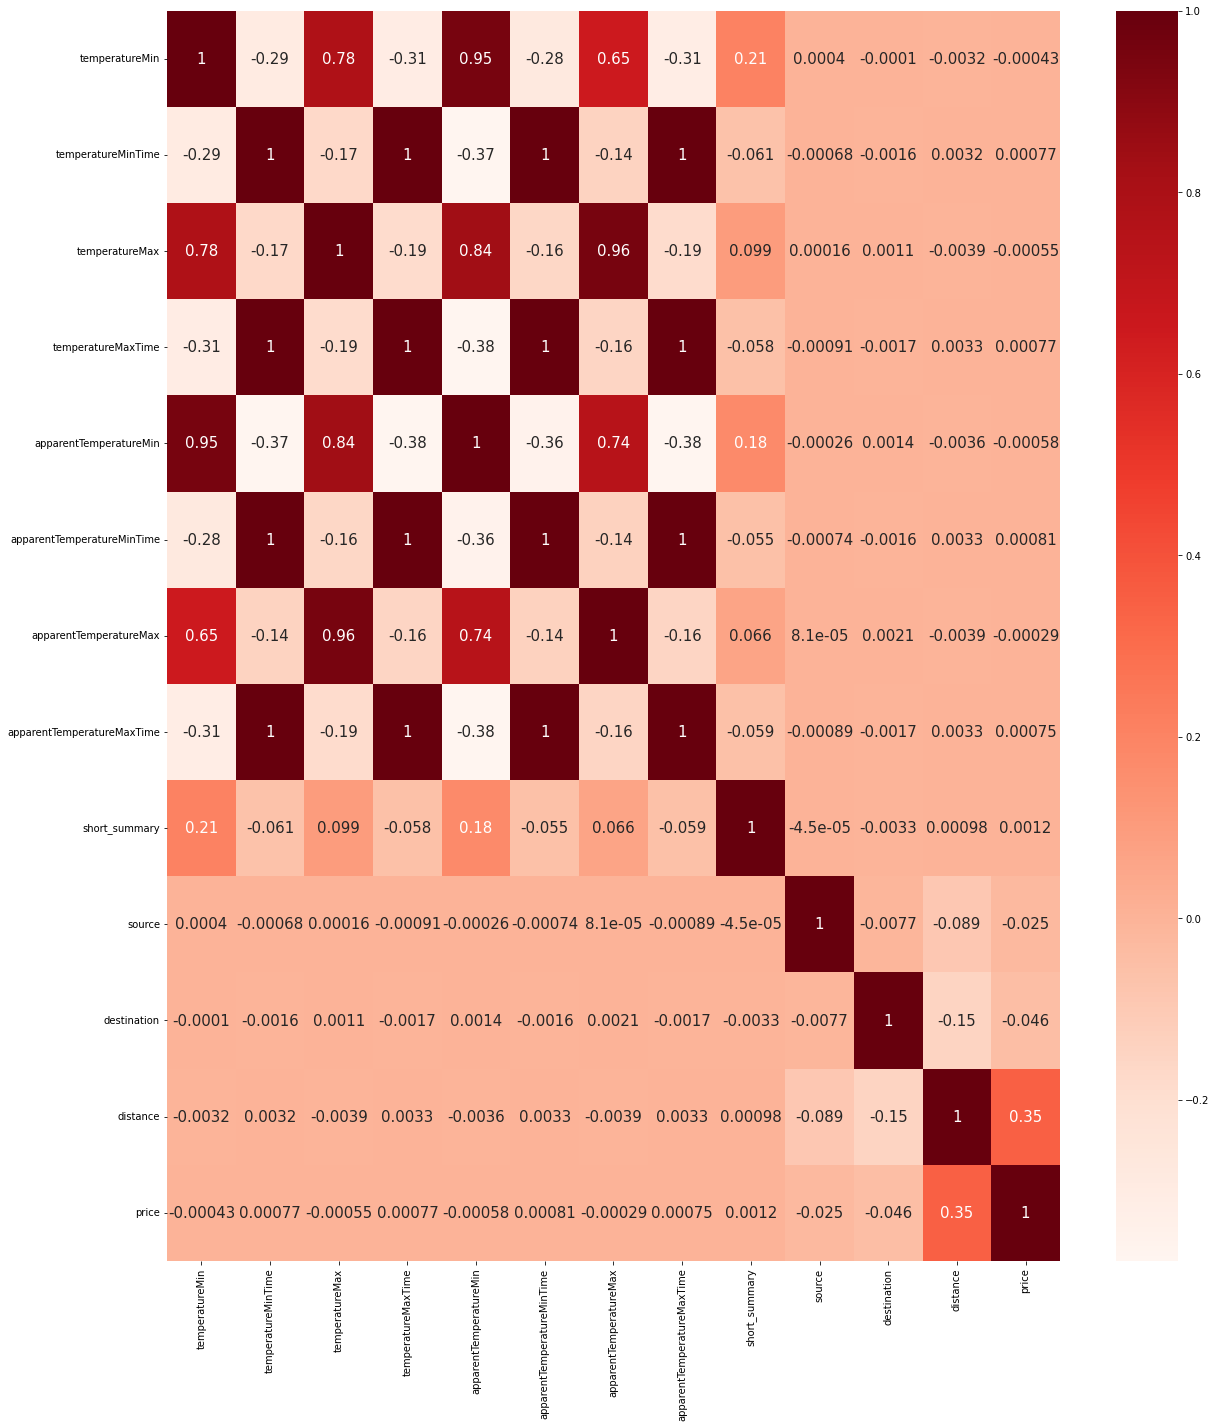

In [45]:
dfnew = ["temperatureMin",'temperatureMinTime','temperatureMax','temperatureMaxTime','apparentTemperatureMin','apparentTemperatureMinTime','apparentTemperatureMax','apparentTemperatureMaxTime','short_summary','source','destination','distance',"price"]
heat_map(df_korelasi_encode,dfnew)

### Kesimpulan dari data 

Cuaca Juga mempengaruhi harga dari pelayanan taxi

# F. Data Preprocessing

Pada dataPreprosesing, kita akan menghapus data data yang tidak kita perlukan. Pada case yang diangkat kali ini kita akan memprediksi harga dari layanan tersebut. Dikarenakan data memilik 57 kolom, maka kita akan memfilter satu satu dengan menggunakan heatmap. Tapi sebelum kita melakukan heatmap tsbt, kita lakukan penghapusan kolom yang memang tidak ada hubungannya sama sekali dengan prediksi harga. Untuk data ynag kita modelkan nantinya, kita akan menggunakan variabel baru yaitu df_modeling 

Pertama, kita hapus kolom yang tidak sangat dibutuhkan diantaranya ID, TimeStamp, Date, Produk_ID.
> ID dihapus diakrenkan itu hanya berisikan kode unik dari pemesanan saja

> TimeStamp Tidak diperlukan karena itu jumlah dari detik jam

> Date tidak diperlukan karena sudah ada kolom Day

> Produk ID tidak bisa dipakai karena pada bagian UBER layanannya di encript

In [46]:
df_modeling = df.drop(['id','timestamp','datetime','product_id'],axis=1)

In [47]:
df_modeling.head()

,hour,day,month,timezone,source,destination,cab_type,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,9,16,12,America/New_York,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,2,27,11,America/New_York,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,1,28,11,America/New_York,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,4,30,11,America/New_York,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,3,29,11,America/New_York,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [48]:
df_modeling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hour                         637976 non-null  int64  
 1   day                          637976 non-null  int64  
 2   month                        637976 non-null  int64  
 3   timezone                     637976 non-null  object 
 4   source                       637976 non-null  object 
 5   destination                  637976 non-null  object 
 6   cab_type                     637976 non-null  object 
 7   name                         637976 non-null  object 
 8   price                        637976 non-null  float64
 9   distance                     637976 non-null  float64
 10  surge_multiplier             637976 non-null  float64
 11  latitude                     637976 non-null  float64
 12  longitude                    637976 non-null  float64
 13 

Sekranga kita lihat nilai dari kolom yang bertipe objek da category. nantinya kita akan menghapus kolom yang hanya memiliki 1 nilai saja dalam kolomnya

In [49]:
nilai_kategori_kolom = df_modeling.select_dtypes(include=['object','category']).columns.tolist() #membuat variabel yang nantinya digunakan untuk menyimpan nilai modeling dengan  tipe objek dan kategori yang akan dirubah menjadi list
for column in df_modeling[nilai_kategori_kolom]: # dilakukan perulangan untuk mengecek smua kategori dan obejk
    print(f'{column} : {df_modeling[column].unique()}') #mencetak hasil isi dari kolom
    print()

timezone : ['America/New_York']

source : ['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']

destination : ['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']

cab_type : ['Lyft' 'Uber']

name : ['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool']

short_summary : [' Mostly Cloudy ' ' Rain ' ' Clear ' ' Partly Cloudy ' ' Overcast '
 ' Light Rain ' ' Foggy ' ' Possible Drizzle ' ' Drizzle ']

long_summary : [' Rain throughout the day. '
 ' Rain until morning, starting again in the evening. '
 ' Light rain in the morning. ' ' Partly cloudy throughout the day. '
 ' Mostly cloudy throughout the day. '
 ' Light rain in the morning and overn

Terdapat kolom bernama timezone yang hanya memiliki 1 nilai saja. Yang berartikan bahwa seluruh daerahnya memiliki nilai yang sama yaitu AMERICA/NEWYORK

In [50]:
df_modeling.drop('timezone',axis=1)
df_modeling.shape

(637976, 52)

Lalu kita akan menyeleksi kolom kolom yang tidak diapakai dalam modeling ini nanti, diantaranya

> source,destination, latitute, longtitude: Data beriskian lokasi, titik koordinat, dan di dalamdata sudah ada namanya kolom distance yang sudah cukup untuk mewakili keempat kolom diatas

>  long_summary, icon,temperatureHighTime, temperatureLowTime, apparentTemperatureHighTime, apparentTemperatureLowTime, uvIndexTime, temperatureMinTime, temperatureMaxTime, apparentTemperatureMinTime, apparentTemperatureMaxTime, dan kolom lainnya yang berhubungan dengan cuaca : informasi cuaca sudah terkandung dialam temperature dan short_summary. Jadi tidak perlu menggunakan yang lainnya


>moonPhase: Jika informasi fase bulan tidak relevan dalam prediksi harga taxi, maka kolom moonPhase bisa dihapus.

>uvIndex, uvIndexTime, ozone: Jika informasi indeks sinar ultraviolet (UV) dan ozon tidak relevan dalam prediksi harga taxi, maka kolom-kolom ini bisa dihapus.

In [51]:
df_modeling = df_modeling.loc[:,["hour","day",'month','distance','temperature','short_summary','cab_type','name','surge_multiplier','price']]

Sekarang mari kita lakukan uji heatmap untuk menentukan korelasi pada target price

Tapi sebelum melakukan heatmap, mari kita encode smua objek menjadi numerik

In [52]:
le = preprocessing.LabelEncoder() # Membuat objek LabelEncoder() dari modul preprocessing dan menyimpannya dalam variabel le

df_korelasi_encode = df_modeling.copy() # Membuat salinan dataframe df_korelasi_kolom_3 dan menyimpannya dalam variabel df_korelasi_kolom_3_encode

for col in df_korelasi_encode.select_dtypes(include='O').columns: # Melakukan iterasi pada setiap kolom dalam dataframe df_korelasi_kolom_3_encode yang memiliki tipe data 'O' (objek)
    df_korelasi_encode[col]=le.fit_transform(df_modeling[col]) # Menggunakan objek LabelEncoder() untuk mengubah nilai-nilai dalam kolom menjadi angka (encoding) dan menyimpan hasilnya dalam kolom yang sama di dataframe df_korelasi_kolom_3_encode

Kita gunakan Variabel pada Analisis berdasarkan waktu terlebih dahulu

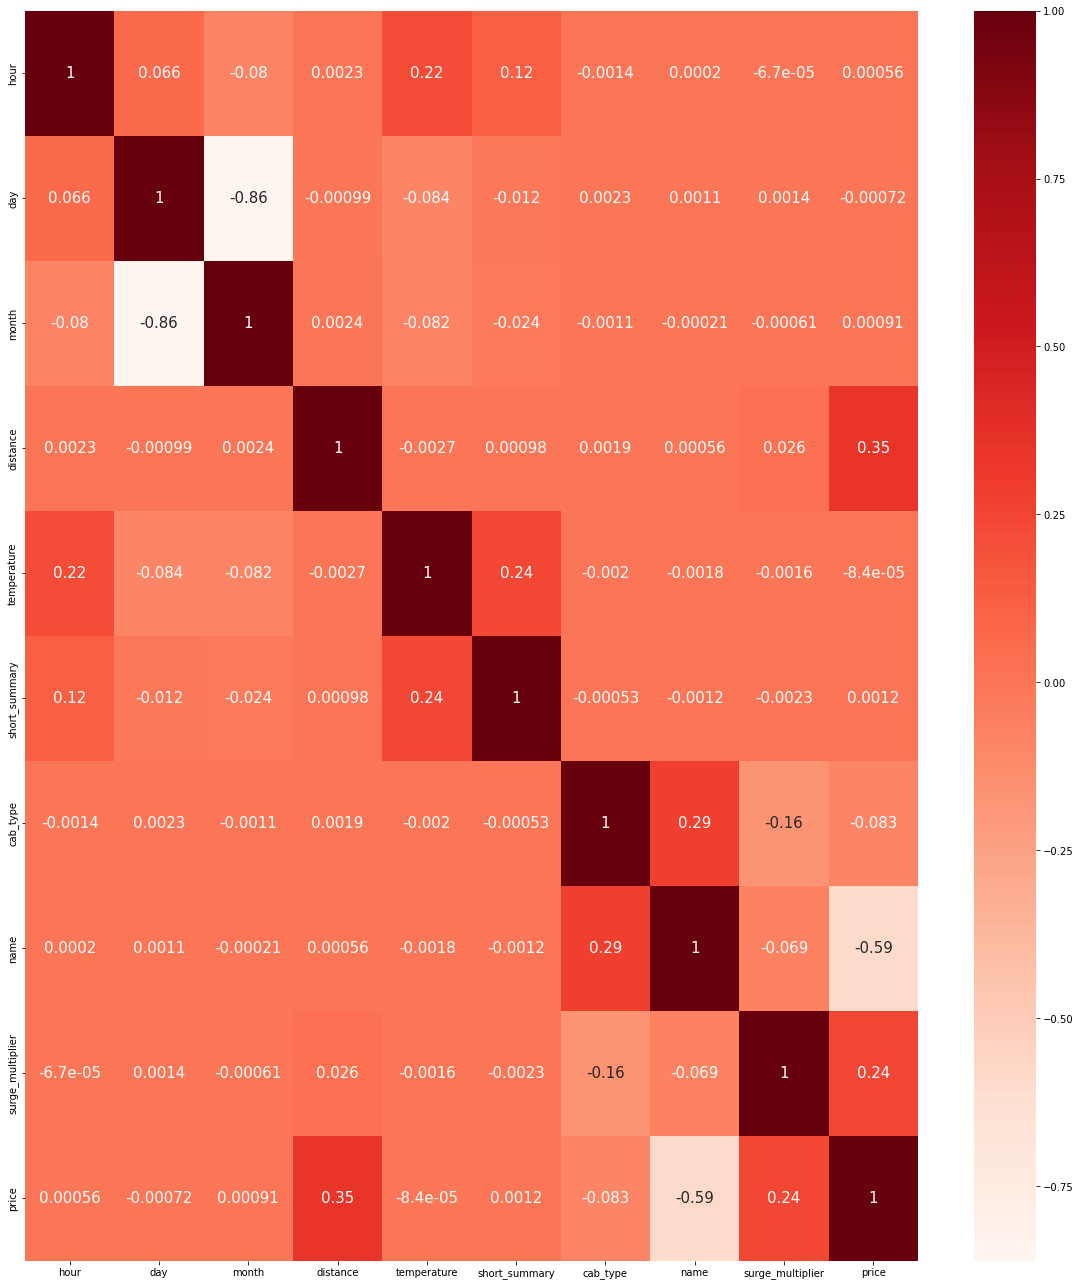

In [53]:
heat_map_modeling = ["hour","day",'month','distance','temperature','short_summary','cab_type','name','surge_multiplier','price']
heat_map(df_korelasi_encode,heat_map_modeling)

_keterangan_

Berdasarkan urutan korelasi yang diberikan, dari yang kuat hingga tidak kuat adalah sebagai berikut:

"distance" (korelasi positif: 0.35)

"name" (korelasi negatif: -0.59)

"surge_multiplier" (korelasi positif: 0.24)

"cab_type" (korelasi negatif: -0.083)

"short_summary" (korelasi positif: 0.0012)

"month" (korelasi positif: 0.00091)

"hour" (korelasi positif: 0.00056)

"day" (korelasi negatif: -0.00072)

"temperature" (korelasi negatif: -8.4e-05)

Kita hapus saja kolom yang sangat lemah korelasinya yaitu temprateure

In [54]:
df_modeling = df_modeling.loc[:,["hour","day",'month','distance','short_summary','cab_type','name','surge_multiplier','price']]

Setelah mendapatkan kolom kolom yang kita inginkan, sekarang kita mengecek OUTLIER yang ada

In [55]:
Qp12 = df_modeling['price'].quantile(0.25) # Menghitung kuartil 1 (Q1) dari kolom 'price' dalam dataframe df_modeling dan menyimpannya dalam variabel Qp12
Qp32 = df_modeling['price'].quantile(0.75) # Menghitung kuartil 3 (Q3) dari kolom 'price' dalam dataframe df_modeling dan menyimpannya dalam variabel Qp32
IQRp = Qp32-Qp12 # Menghitung rentang antarkuartil (IQR) dari kolom 'price' dalam dataframe df_modeling dan menyimpannya dalam variabel IQRp
print("Nilai Kuartil 1 : " ,Qp12)
print("Nilai Kuartil 3 : " ,Qp32)
print("Nilai Rentang : " ,IQRp)

Nilai Kuartil 1 :  9.0
Nilai Kuartil 3 :  22.5
Nilai Rentang :  13.5


In [56]:
# Melakukan filtering pada dataframe df_modeling berdasarkan kondisi yang diberikan
# Kondisi adalah nilai kolom 'price' harus lebih besar dari (Qp32 + (1.5 * IQRp))
#Angka 1.5 dalam rumus (Qp32 + (1.5 * IQRp)) atau (Qp12 - (1.5 * IQRp)) adalah nilai yang digunakan dalam metode IQR (Interquartile Range) untuk mengidentifikasi outlier.
df_modeling[df_modeling['price'] > (Qp32 + (1.5 * IQRp))]

,hour,day,month,distance,short_summary,cab_type,name,surge_multiplier,price
706,10,28,11,3.25,Partly Cloudy,Lyft,Lux Black,2.00,52.50
707,2,16,12,3.25,Partly Cloudy,Lyft,Lux Black XL,2.00,67.50
769,17,14,12,4.76,Partly Cloudy,Lyft,Lux Black XL,1.00,45.50
1094,17,2,12,4.31,Light Rain,Lyft,Lux Black XL,1.00,45.50
1318,16,16,12,5.33,Overcast,Lyft,Lux Black XL,1.00,45.50
1321,18,15,12,4.50,Partly Cloudy,Lyft,Lux Black XL,1.00,45.50
1333,8,3,12,0.46,Foggy,Lyft,Lux Black XL,1.75,45.50
1762,9,2,12,5.32,Light Rain,Lyft,Lux Black XL,1.00,47.50
1936,22,1,12,4.35,Partly Cloudy,Lyft,Lux Black XL,1.00,45.50
2043,1,4,12,2.81,Partly Cloudy,Lyft,Lux Black XL,1.50,52.50


In [57]:
# Melakukan filtering pada dataframe new_df berdasarkan kondisi yang diberikan
# Kondisi adalah nilai kolom 'price' harus kurang dari (Qp12 - (1.5 * IQRp))
df_modeling[df_modeling['price']<(Qp12-(1.5*IQRp))]

,hour,day,month,distance,short_summary,cab_type,name,surge_multiplier,price


In [58]:
print('Data sebelum di hilangkan outliernya :',df_modeling.shape)
df_modeling= df_modeling[~((df_modeling['price']>(Qp32+(1.5*IQRp))))]
print('Data sesudah dihilangkan outliernya :',df_modeling.shape)

Data sebelum di hilangkan outliernya : (637976, 9)
Data sesudah dihilangkan outliernya : (632387, 9)


In [59]:
df_modeling.head()

,hour,day,month,distance,short_summary,cab_type,name,surge_multiplier,price
0,9,16,12,0.44,Mostly Cloudy,Lyft,Shared,1.0,5.0
1,2,27,11,0.44,Rain,Lyft,Lux,1.0,11.0
2,1,28,11,0.44,Clear,Lyft,Lyft,1.0,7.0
3,4,30,11,0.44,Clear,Lyft,Lux Black XL,1.0,26.0
4,3,29,11,0.44,Partly Cloudy,Lyft,Lyft XL,1.0,9.0


Sekarang kita buat fungsi yang gunanya untuk menguhanya menjadi 1 0 dengan one hot encoder

In [60]:
def one_hot_encoder(data, feature, keep_first=True):
    # Melakukan one-hot encoding pada fitur yang diberikan
    one_hot_cols = pd.get_dummies(data[feature])
    
    # Mengganti nama setiap kolom dalam DataFrame one_hot_cols
    for col in one_hot_cols.columns:
        one_hot_cols.rename({col:f'{feature}_'+col}, axis=1, inplace=True)
    
    # Menggabungkan DataFrame one_hot_cols dengan dataset data
    new_data = pd.concat([data, one_hot_cols], axis=1)
    # Menghapus fitur yang telah diencode
    new_data.drop(feature, axis=1, inplace=True)
    
    # Jika keep_first di set sebagai False, maka fitur pertama akan dihapus dari hasil encoding
    if keep_first == False:
        new_data = new_data.iloc[:, 1:]
    
    return new_data

In [61]:
# Melakukan copy dataframe df_modeling menjadi new_df_onehot
new_df_onehot = df_modeling.copy()

# Looping untuk setiap kolom yang memiliki tipe data object (string)
for col in new_df_onehot.select_dtypes(include='O').columns:
    # Menggunakan fungsi one_hot_encoder untuk melakukan one-hot encoding pada kolom tersebut
    new_df_onehot = one_hot_encoder(new_df_onehot, col)

# Menampilkan 5 baris pertama dari dataframe new_df_onehot
new_df_onehot.head()


,hour,day,month,distance,surge_multiplier,price,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,9,16,12,0.44,1.0,5.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,27,11,0.44,1.0,11.0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,28,11,0.44,1.0,7.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,4,30,11,0.44,1.0,26.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3,29,11,0.44,1.0,9.0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


# G. Pendefinisian Model

In [62]:
model1 = LinearRegression()
model2 = KNeighborsClassifier()

# H. Pelatihan Model

In [63]:
from sklearn.model_selection import train_test_split
X = new_df_onehot.drop(columns=['price'],axis=1).values
y = new_df_onehot['price'].values

# Memisahkan data menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [65]:
model1_LR = model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)

In [66]:
mse = mean_squared_error(y_test, y_pred)  # Menghitung Mean Squared Error (MSE)
rmse = np.sqrt(mse)  # Menghitung akar kuadrat dari MSE, yang merupakan Root Mean Squared Error (RMSE)
print(r2_score(y_test, y_pred)*100)  # Menghitung R-squared (koefisien determinasi) dan mencetak hasilnya dalam persentase
print(mse)  # Mencetak nilai MSE
print(rmse)  # Mencetak nilai RMSE


93.37806585535104
5.108247844089574
2.260143323793775


In [67]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

5.108247844089574
2.260143323793775


# I. Evaluasi Model

# J. Model Inference

# H. Pengambilan Kesimpulan